## Vehicle Number Plate Segmentation
* Nama : Ilham Yudantyo
* NIM  : 2141720091
* Kelas: TI-3H

### Import Library

In [27]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import os 

In [7]:
# define function for image processing
def pre_proc(img, typeimg):
    result = img
    if typeimg == 'gray':
        result = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    elif typeimg == 'rgb':
        result = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    return result

In [22]:
# define function for image segmentation
def segment_process(img):
    X = img
    
    # Reshape the image to be a 2D array of pixels and 3 color values (RGB) or 1 color value (Grayscale)
    if len(img.shape) == 3:
       # Reshape the image to be a 2D array of pixels and 3 color values (RGB)
       X =  X.reshape(-1,3)
    elif len(img.shape) == 2:
       # Reshape the image to be a 2D array of pixels and 1 color value (Grayscale)
       X =  X.reshape(-1,1)
    
    #  Perform PCA to reduce dimensions
    n_components = X.shape[1]
    pca = PCA(n_components=n_components)
    X_reduced = pca.fit_transform(X)
        
    # Perform K-means clustering
    model = KMeans(n_clusters=2)
    model.fit(X_reduced)
    
    # Get cluster labels
    labels = model.labels_
    
    # Get cluster centers
    cluster_centers = pca.inverse_transform(model.cluster_centers_)
    
    # Reshape back to original shape
    segmented_image = cluster_centers[labels].reshape(img.shape).astype(np.uint8)
    
    return segmented_image
    

In [57]:
def compare_images(img1, img2):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))
    
    # Plot gambar pertama pada subplot pertama (kolom 1) dan atur judul
    axes[0].imshow(img1)
    axes[0].axis('off')
    axes[0].set_title('Original Image', fontsize=20)

    # Plot gambar kedua pada subplot kedua (kolom 2) dan atur judul
    axes[1].imshow(img2)
    axes[1].axis('off')
    axes[1].set_title('Segmented Image', fontsize=20)

    # Anda dapat menyesuaikan judul dan pengaturan subplot lainnya sesuai kebutuhan Anda

    # Tampilkan plot
    plt.show()

d:\folder_laptop\apk_desktop\Anaconda\installation\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


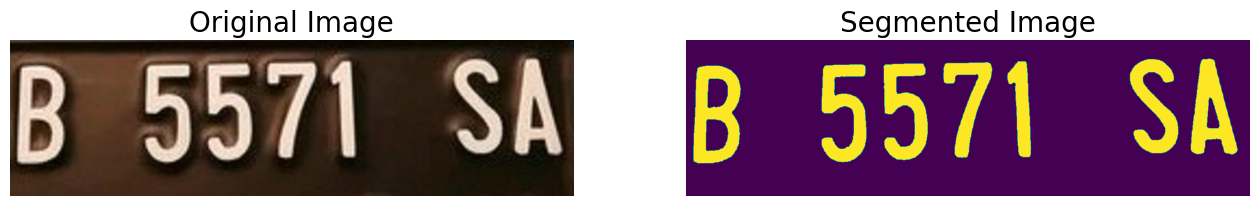

d:\folder_laptop\apk_desktop\Anaconda\installation\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


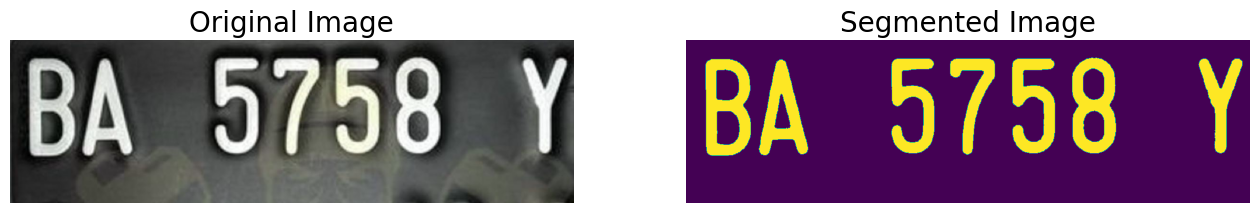

d:\folder_laptop\apk_desktop\Anaconda\installation\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


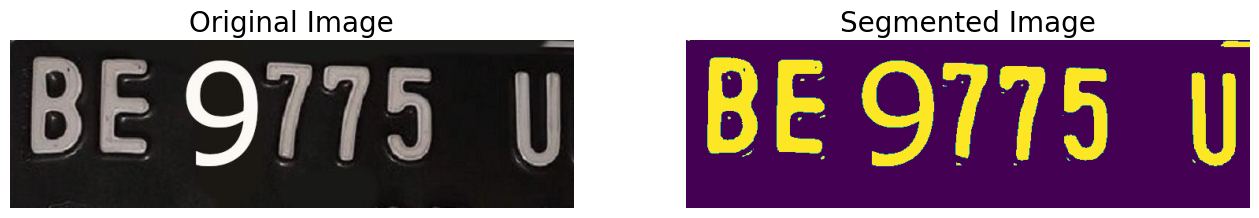

d:\folder_laptop\apk_desktop\Anaconda\installation\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


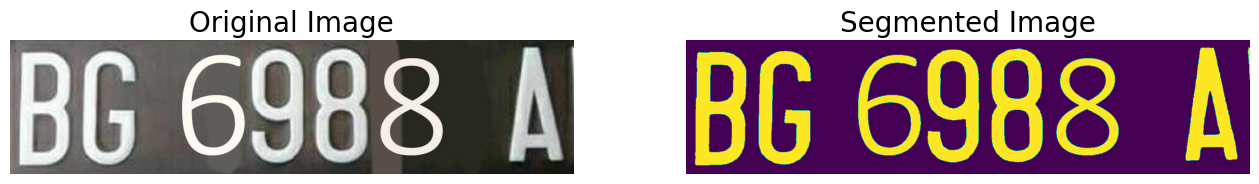

d:\folder_laptop\apk_desktop\Anaconda\installation\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


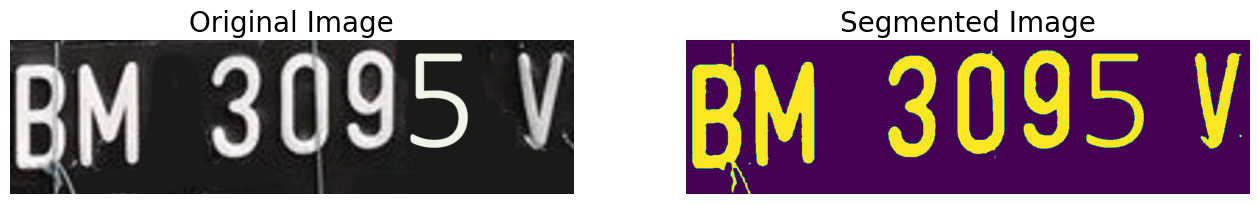

d:\folder_laptop\apk_desktop\Anaconda\installation\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


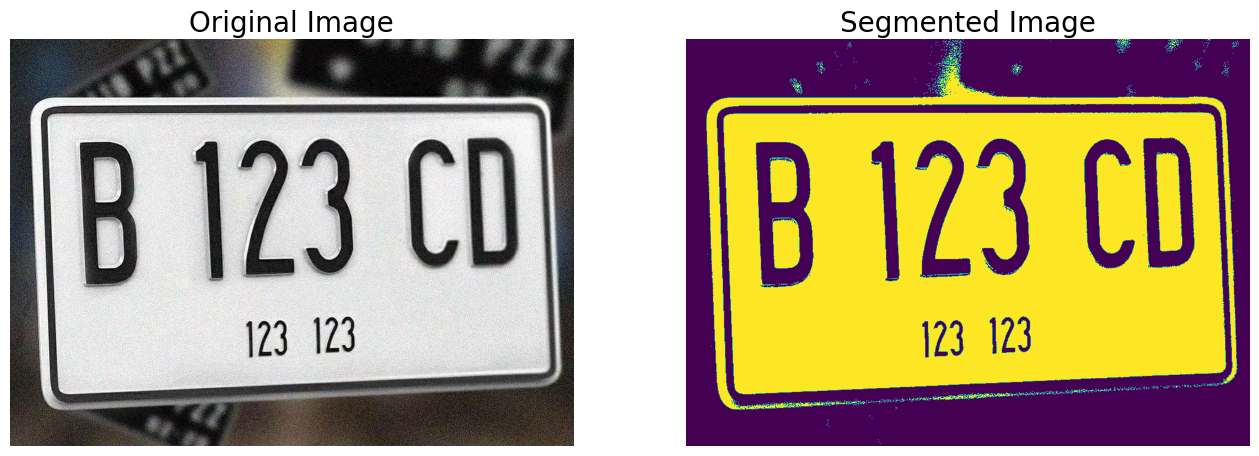

d:\folder_laptop\apk_desktop\Anaconda\installation\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


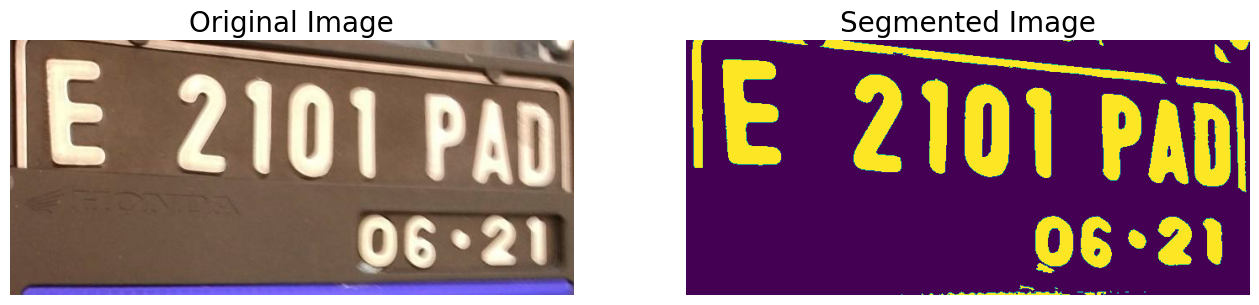

d:\folder_laptop\apk_desktop\Anaconda\installation\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


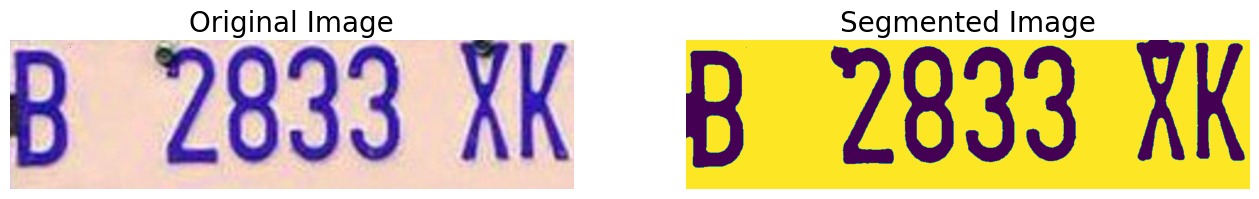

In [58]:
# -> RUNNING SECTION <-
folder_path = 'folder-img'
file_list = os.listdir(folder_path)
image_files = [file for file in file_list if file.lower().endswith(('.jpg'))]


# compare images
for image_files in image_files:
    image = cv.imread(os.path.join(folder_path, image_files))
    
    # pre-processing 
    img = pre_proc(image, 'gray')
    # segmentation
    segment_image = segment_process(img)
    # show result
    compare_images(image, segment_image)
    